In [469]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('forestfires.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


количество объектов: 517; признаков: 13

X - координата в пространстве по оси Х в границах карты парка Монтесиньо: от 1 до 9
Y - координата в пространстве по оси Y в границах карты парка Монтесиньо: от 2 до 9
month - месяц года: от 'jan' до 'dec'
day - день недели: от 'mon' до 'sun'
FFMC - The Fine Fuel Moisture Code - индекс влажности измельченного топлива (индекс системы пожаров и погоды): от 18.7 до 96.20
DMC - The Duff Moisture Code - индекс влажности штыба (мелкий уголь) (индекс системы пожаров и погоды): от 1.1 до 291.3
DC - The Drought Code - индекс засушливости (индекс системы пожаров и погоды): от 7.9 до 860.6
ISI - The Initial Spread Index - индекс мгновенного распространения (индекс системы пожаров и погоды): от 0.0 до 56.10
temp - температура в градусах Цельсия: от 2.2 до 33.30
RH - относительная влажность в %: от 15.0 до 100
wind - скорость ветра в км/ч: от 0.40 до 9.40
rain - дождевые осадки в мм/м2 : от 0.0 до 6.4
area - выжженые территори в га: от 0.00 до 1090.84

In [470]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.day)
data.day = label.transform(data.day)

label2 = LabelEncoder()
label2.fit(data.month)
data.month = label2.transform(data.month)

In [471]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [472]:
from sklearn.preprocessing import StandardScaler

scale_features_std = StandardScaler()
features_std = scale_features_std.fit_transform(data[['DMC', 'FFMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']])
features_std

array([[-1.32332557, -0.80595947, -1.83047676, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [-1.17954077, -0.00810203,  0.48889092, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [-1.04982188, -0.00810203,  0.56071545, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [-0.84664771, -1.64008316,  0.47476811, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.54900254,  0.68095666,  0.26938221, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [-1.68591332, -2.02087875, -1.78044169, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [473]:
data[['DMC', 'FFMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']] = features_std
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,7,4,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,7,4,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,8,6,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,8,6,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,2,4,1,3,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,7,4,1,3,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,1,4,1,2,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [474]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,4.669246,4.299807,5.758221,2.736944,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16
std,2.313778,1.229900,4.373275,1.925061,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,1.000000,2.000000,0.000000,0.000000,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,3.000000,4.000000,1.000000,1.000000,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,4.000000,4.000000,6.000000,3.000000,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,7.000000,5.000000,11.000000,4.000000,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,9.000000,9.000000,11.000000,6.000000,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [475]:
target = data.area
train = data.drop(['X', 'Y', 'day', 'area'], axis=1)

Столбец с целевым признаком - area

In [476]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape
print(N_train, N_test) # 361 156

361 156


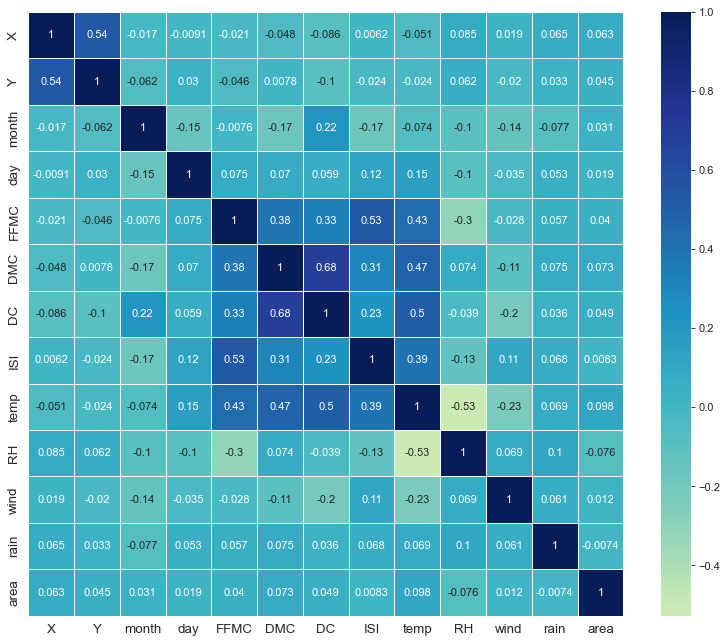

In [477]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='YlGnBu', center=0, annot=True,linewidths=.5)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наблюдается зависимости:
а) Отрицательные между: RH и temp, RH и FFMC
б) Положительные между: Х и У, DC и DMC, FFMC и ISI, DMC и temp, FFMC и temp

Построим линейные регрессии с помощью метода наименьших квадратов и введем в модели функции логарифма и степени

In [478]:
import statsmodels.api as sm

X_train_sm = data.drop(['area'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
y_train = data.area
model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.065
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.388
Time:                        16:22:37   Log-Likelihood:                -727.12
No. Observations:                 517   AIC:                             1480.
Df Residuals:                     504   BIC:                             1535.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.189     -1.499      0.1

In [479]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['X', 'Y', 'day', 'month', 'DMC', 'FFMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# посчитаем значение VIF параметров
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

   feature        VIF
0        X   7.278599
1        Y  10.813263
2      day   2.767549
3    month   3.354507
4      DMC   2.698339
5     FFMC   1.711522
6       DC   2.748814
7      ISI   1.607643
8     temp   2.764731
9       RH   1.958534
10    wind   1.148289
11    rain   1.049804


значение VIF параметров X, Y больше 7.27, уберем параметр Y

In [480]:
X = data[['X', 'day', 'month', 'DMC', 'FFMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# посчитаем значение VIF параметров
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

   feature       VIF
0        X  3.194730
1      day  2.301874
2    month  2.810390
3      DMC  2.575068
4     FFMC  1.706059
5       DC  2.596450
6      ISI  1.607605
7     temp  2.755170
8       RH  1.955450
9     wind  1.147968
10    rain  1.048495


In [481]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['ISI'])):
    X_train_sm['ISI'][i] = X_train_sm['ISI'][i] * X_train_sm['ISI'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.125
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.339
Time:                        16:22:38   Log-Likelihood:                -727.33
No. Observations:                 517   AIC:                             1479.
Df Residuals:                     505   BIC:                             1530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2594      0.142     -1.828      0.0

In [482]:
import math

X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['ISI'])):
    X_train_sm['ISI'][i] = X_train_sm['ISI'][i] * X_train_sm['ISI'][i] * X_train_sm['ISI'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.117
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.345
Time:                        16:22:38   Log-Likelihood:                -727.38
No. Observations:                 517   AIC:                             1479.
Df Residuals:                     505   BIC:                             1530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2636      0.142     -1.858      0.0

In [483]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['temp'])):
    X_train_sm['temp'][i] = X_train_sm['temp'][i] * X_train_sm['temp'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.107
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.354
Time:                        16:22:38   Log-Likelihood:                -727.43
No. Observations:                 517   AIC:                             1479.
Df Residuals:                     505   BIC:                             1530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2901      0.148     -1.962      0.0

In [484]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['DMC'])):
    X_train_sm['DMC'][i] = X_train_sm['DMC'][i] * X_train_sm['DMC'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9574
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.485
Time:                        16:22:39   Log-Likelihood:                -728.26
No. Observations:                 517   AIC:                             1481.
Df Residuals:                     505   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2336      0.145     -1.615      0.1

In [485]:
from math import log

X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['DMC'])):
    if X_train_sm['DMC'][i] > 0:
        X_train_sm['DMC'][i] = log(X_train_sm['DMC'][i], 2)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9437
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.498
Time:                        16:22:39   Log-Likelihood:                -728.33
No. Observations:                 517   AIC:                             1481.
Df Residuals:                     505   BIC:                             1532.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2205      0.141     -1.568      0.1

In [486]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['rain'])):
    if X_train_sm['rain'][i] > 0:
        X_train_sm['rain'][i] = pow(X_train_sm['rain'][i], 0.4)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.178
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.299
Time:                        16:22:39   Log-Likelihood:                -727.04
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2677      0.143     -1.873      0.0

In [487]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['DC'])):
    X_train_sm['DC'][i] = pow(X_train_sm['DC'][i], 2)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.100
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.359
Time:                        16:22:40   Log-Likelihood:                -727.47
No. Observations:                 517   AIC:                             1479.
Df Residuals:                     505   BIC:                             1530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2295      0.148     -1.555      0.1

In [488]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['DC'])):
    if X_train_sm['DC'][i] > 0:
        X_train_sm['DC'][i] = log(X_train_sm['DC'][i], 10)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.126
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.338
Time:                        16:22:40   Log-Likelihood:                -727.33
No. Observations:                 517   AIC:                             1479.
Df Residuals:                     505   BIC:                             1530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2839      0.167     -1.698      0.0

In [489]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['DC'])):
    if X_train_sm['DC'][i] > 0:
        X_train_sm['DC'][i] = pow(X_train_sm['DC'][i], 1.4)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.188
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.292
Time:                        16:22:40   Log-Likelihood:                -726.99
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2708      0.143     -1.890      0.0

In [490]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['month'])):
    X_train_sm['month'][i] = X_train_sm['month'][i] * X_train_sm['month'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.210
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.277
Time:                        16:22:40   Log-Likelihood:                -726.87
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2554      0.135     -1.893      0.0

In [491]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['RH'])):
    X_train_sm['RH'][i] = X_train_sm['RH'][i] * X_train_sm['RH'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.107
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.353
Time:                        16:22:41   Log-Likelihood:                -727.43
No. Observations:                 517   AIC:                             1479.
Df Residuals:                     505   BIC:                             1530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2679      0.143     -1.867      0.0

In [492]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['RH'])):
    if X_train_sm['RH'][i] > 0:
        X_train_sm['RH'][i] = log(X_train_sm['RH'][i], 10)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.173
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.303
Time:                        16:22:41   Log-Likelihood:                -727.07
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2991      0.147     -2.032      0.0

In [493]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['RH'])):
    if X_train_sm['RH'][i] > 0:
        X_train_sm['RH'][i] = pow(X_train_sm['RH'][i], 0.3)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.162
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.311
Time:                        16:22:41   Log-Likelihood:                -727.13
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2575      0.142     -1.814      0.0

In [494]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['FFMC'])):
    if X_train_sm['FFMC'][i] > 0:
        X_train_sm['FFMC'][i] = pow(X_train_sm['FFMC'][i], 0.5)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.160
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.312
Time:                        16:22:41   Log-Likelihood:                -727.14
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2581      0.142     -1.822      0.0

In [495]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['FFMC'])):
    if X_train_sm['FFMC'][i] > 0:
        X_train_sm['FFMC'][i] = log(X_train_sm['FFMC'][i], 10)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.159
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.313
Time:                        16:22:41   Log-Likelihood:                -727.15
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2627      0.148     -1.774      0.0

In [496]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['FFMC'])):
    X_train_sm['FFMC'][i] = X_train_sm['FFMC'][i] * X_train_sm['FFMC'][i] * X_train_sm['FFMC'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.165
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.309
Time:                        16:22:42   Log-Likelihood:                -727.11
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2600      0.142     -1.834      0.0

In [497]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['wind'])):
    X_train_sm['wind'][i] = X_train_sm['wind'][i] * X_train_sm['wind'][i]

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.062
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.390
Time:                        16:22:42   Log-Likelihood:                -727.68
No. Observations:                 517   AIC:                             1479.
Df Residuals:                     505   BIC:                             1530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2374      0.149     -1.594      0.1

In [498]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['wind'])):
    if X_train_sm['wind'][i] > 0:
        X_train_sm['wind'][i] = pow(X_train_sm['wind'][i], 0.2)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.193
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.289
Time:                        16:22:42   Log-Likelihood:                -726.96
No. Observations:                 517   AIC:                             1478.
Df Residuals:                     505   BIC:                             1529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2533      0.141     -1.791      0.0

In [499]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['wind'])):
    if X_train_sm['wind'][i] > 0:
        X_train_sm['wind'][i] = log(X_train_sm['wind'][i], 20)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.234
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.261
Time:                        16:22:42   Log-Likelihood:                -726.74
No. Observations:                 517   AIC:                             1477.
Df Residuals:                     505   BIC:                             1528.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2053      0.145     -1.418      0.1

In [500]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

for i in range(len(X_train_sm['wind'])):
    if X_train_sm['wind'][i] > 0:
        X_train_sm['wind'][i] = log(X_train_sm['wind'][i], 20)
    X_train_sm['month'][i] = X_train_sm['month'][i] * X_train_sm['month'][i]
    if X_train_sm['rain'][i] > 0:
        X_train_sm['rain'][i] = pow(X_train_sm['rain'][i], 0.4)
    if X_train_sm['DC'][i] > 0:
        X_train_sm['DC'][i] = pow(X_train_sm['DC'][i], 1.4)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.337
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.200
Time:                        16:22:43   Log-Likelihood:                -726.17
No. Observations:                 517   AIC:                             1476.
Df Residuals:                     505   BIC:                             1527.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2208      0.141     -1.569      0.1

In [501]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE

X_train_sm = data.drop(['area', 'Y', 'day', 'FFMC', 'RH'], axis = 1)

for i in range(len(X_train_sm['wind'])):
    if X_train_sm['wind'][i] > 0:
        X_train_sm['wind'][i] = log(X_train_sm['wind'][i], 20)
    X_train_sm['month'][i] = X_train_sm['month'][i] * X_train_sm['month'][i]
    if X_train_sm['rain'][i] > 0:
        X_train_sm['rain'][i] = pow(X_train_sm['rain'][i], 0.4)
    if X_train_sm['DC'][i] > 0:
        X_train_sm['DC'][i] = pow(X_train_sm['DC'][i], 1.4)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_copy).fit()

y_pred = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))
print(model.summary())

RMSE :  2.034642
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.771
Date:                Mon, 27 Jun 2022   Prob (F-statistic):             0.0804
Time:                        16:22:43   Log-Likelihood:                -726.48
No. Observations:                 517   AIC:                             1471.
Df Residuals:                     508   BIC:                             1509.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1912      0.121   

In [502]:
X_train_sm = data.drop(['area', 'Y'], axis = 1)

X_train_copy = sm.add_constant(X_train_sm)
model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.8522
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.588
Time:                        16:22:43   Log-Likelihood:                         -728.85
No. Observations:                 517   AIC:                                      1480.
Df Residuals:                     506   BIC:                                      1526.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Проанализировав вышестоящие модели, можно сделать вывод о том, что наилучшая модель:
area ~ X + log(wind, 20) + rain^0.4 + DC^1.4 + ISI + day + month + FFMC + DMC + temp + RH
Показатель R^2 = 2.4%, в основном, у параметров значение p value больше 0.37, значение VIF параметров не превосходит 3.2

Построим классификацию по районам парка Монтесиньо, для этого выделим 3 района (1 район - класс 0 и т.д.)

In [503]:
region_column = []
for i in range(data.shape[0]):
    if 1 <= data['X'][i] <= 3 and 2 <= data['Y'][i] <= 6:
        region_column.append(0)
    elif (4 <= data['X'][i] <= 5 and 3 <= data['Y'][i] <= 6) or (data['X'][i] == 6 and 1 <= data['Y'][i] <= 7):
        region_column.append(1)
    elif (9 >= data['X'][i] >= 7 >= data['Y'][i] >= 3) or (8 <= data['X'][i] <= 9 and 8 <= data['Y'][i] <= 9):
        region_column.append(2)
    # else:
    #     region_column.append(3) мы не найдем таких данных, поэтому всего выделили три района

data['region'] = region_column

In [504]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators':500,
          'max_depth':10,
          'criterion':'mse',
          'learning_rate':0.003,
          'min_samples_leaf':16}
target = data.region
train = data.drop(['region', 'X', 'Y'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 42)

# Обучаем
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)

gbr.score(X_test, y_test)

-0.07203891495227022

In [505]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False)

model.fit(X_train, y_train)
# scores = cross_val_score(model, X_test, y_test, cv=3)
print(model.score(X_test, y_test))

[16:22:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.41025641025641024


Построив две классификации типа Градиентный Бустинг и XGBoost, можно сделать вывод, что классификатор второго типа работает точнее, поскольку значение метрики выше (0.41).

In [506]:
from sklearn.metrics import mean_squared_error as MSE
from xgboost import XGBRegressor
import numpy as np

model = XGBRegressor(n_estimators=1000, max_depth=12, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.877297


Построим регрессию типа XGBRegressor, предскажем значения для тестовой выборки и оценим разницу между предсказанным и фактическим значением с помощью функции MSE. Получим, что значение корня от квадрата ошибки составляет 0.877297. Значение маленькое, значит регрессия точна.

Сравним параметры регионов с максимальной и минимальной площадью сгоревших лесов

In [507]:
region_area = {0: 0, 1: 0, 2: 0}
for i in range(len(data['region'])):
    region_area[data['region'][i]] += data['area'][i]
print(region_area)

{0: -12.336550875975494, 1: 1.6812932295922698, 2: 10.655257646383188}


In [508]:
data_reg = data.set_index('region')
region0 = data_reg.drop([1, 2], axis=0)
region0.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,1.760000e+02,176.000000
mean,2.039773,3.653409,5.352273,2.789773,0.067624,0.143365,0.130445,0.028174,0.139676,-0.071703,-0.039673,-7.326831e-02,-0.070094
std,0.766147,1.105462,4.481173,1.905213,0.875003,0.920077,0.890279,0.881168,0.929782,0.907177,0.998689,5.566953e-17,0.441954
min,1.000000,2.000000,1.000000,0.000000,-7.297618,-1.695291,-2.173459,-1.892764,-2.463222,-1.796637,-2.021098,-7.326831e-02,-0.202020
25%,1.000000,2.750000,1.000000,1.000000,0.023631,-0.333242,0.101119,-0.443828,-0.368758,-0.692456,-0.805959,-7.326831e-02,-0.202020
50%,2.000000,4.000000,5.000000,3.000000,0.182296,0.143436,0.457417,-0.136477,0.191489,-0.232381,-0.233308,-7.326831e-02,-0.202020
75%,3.000000,4.000000,11.000000,4.000000,0.413493,0.577134,0.671277,0.401385,0.760356,0.411724,0.772325,-7.326831e-02,-0.123278
max,3.000000,6.000000,11.000000,6.000000,0.989220,2.799547,1.240224,2.695535,2.449718,2.681429,3.007063,-7.326831e-02,3.145454


In [509]:
region2 = data_reg.drop([1, 0], axis=0)
region2.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,7.649254,5.164179,5.067164,2.679104,0.069573,0.158959,0.067529,0.140891,0.097836,0.197023,-0.005664,0.163985,0.079517
std,0.651862,1.304671,4.200247,1.845950,0.543919,1.096129,0.869395,1.247238,0.944210,1.064221,0.967976,1.915474,1.148771
min,7.000000,3.000000,0.000000,0.000000,-1.640083,-1.685913,-2.179108,-1.563460,-2.377030,-1.367233,-1.741756,-0.073268,-0.202020
25%,7.000000,4.000000,1.000000,1.000000,-0.094234,-0.585647,-0.294723,-0.526153,-0.459260,-0.631113,-0.736124,-0.073268,-0.202020
50%,8.000000,5.000000,5.000000,3.000000,0.173229,-0.062083,0.471944,-0.103547,0.182870,-0.017679,-0.009834,-0.073268,-0.183543
75%,8.000000,6.000000,10.000000,4.000000,0.336427,0.885021,0.607926,0.648363,0.773285,0.948479,0.492982,-0.073268,-0.078266
max,9.000000,9.000000,11.000000,6.000000,0.989220,2.755787,1.216013,10.335381,2.087712,3.356206,3.007063,21.572284,11.533008


Сравним средние значения столбцов FFMC, DMC, DC, ISI, temp, RH, wind, rain у 0-вого и 2-ого региона

In [510]:
print('FFMC difference: ' + str(region0['FFMC'].mean() - region2['FFMC'].mean()))
print('DMC difference: ' + str(region0['DMC'].mean() - region2['DMC'].mean()))
print('DC difference: ' + str(region0['DC'].mean() - region2['DC'].mean()))
print('ISI difference: ' + str(region0['ISI'].mean() - region2['ISI'].mean()))
print('temp difference: ' + str(region0['temp'].mean() - region2['temp'].mean()))
print('RH difference: ' + str(region0['RH'].mean() - region2['RH'].mean()))
print('wind difference: ' + str(region0['wind'].mean() - region2['wind'].mean()))
print('rain difference: ' + str(region0['rain'].mean() - region2['rain'].mean()))

FFMC difference: -0.0019483266286166728
DMC difference: -0.015594852709457374
DC difference: 0.06291603802128605
ISI difference: -0.11271689443752797
temp difference: 0.041840218913472796
RH difference: -0.2687257776286481
wind difference: -0.034008118077450335
rain difference: -0.2372530189363404


В результате, больше всего различаются значения в столбцах RH и rain.